# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

# Data Source
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'raw', 'data_task3.csv')
data = pd.read_csv(path)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Types

In [6]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'species')
cols

{'target': ['species'],
 'time': [],
 'category': [],
 'category+': [],
 'continuous': ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
 'continuous+': [],
 'discrete': []}

# Missing Values

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Duplicated Values

In [8]:
data.duplicated().sum()

3

# Unique Values

In [9]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Distributions

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
visualizer = Visualizer()

## Time

In [12]:
try:
    visualizer.multivariate_subplots(data[cols['continuous']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

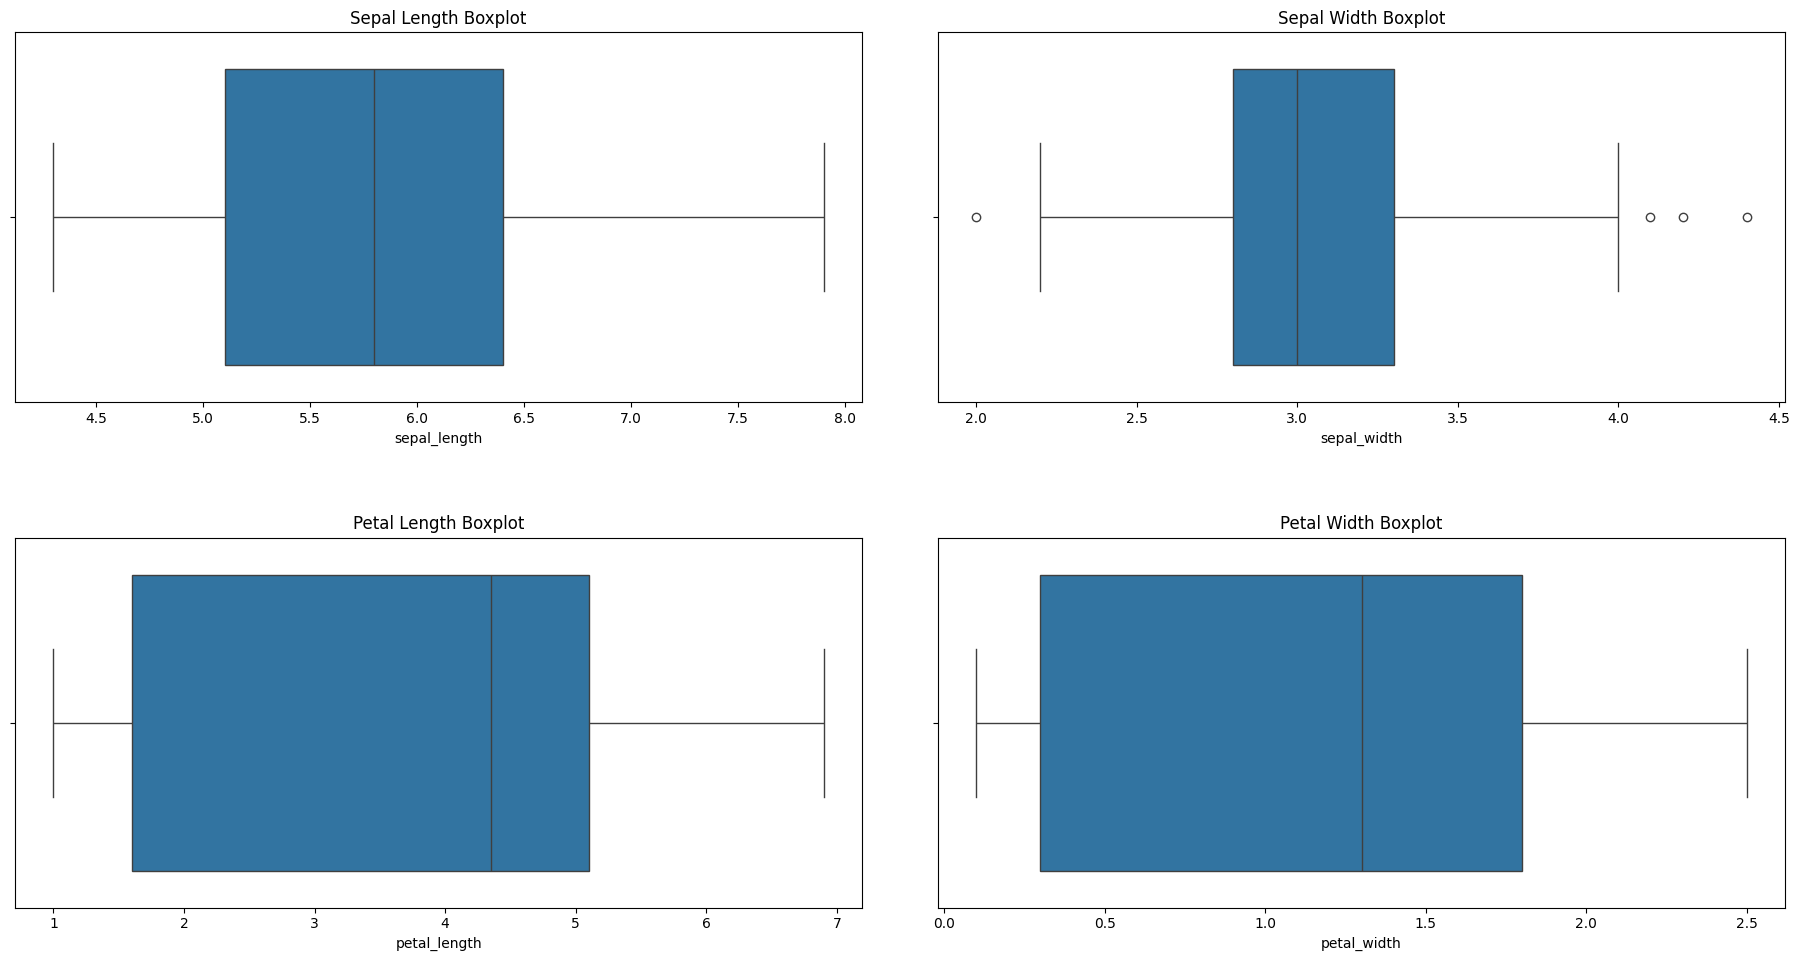

In [13]:
visualizer.univariate_subplots(data[cols['continuous']], 'boxplot', 2, 2)

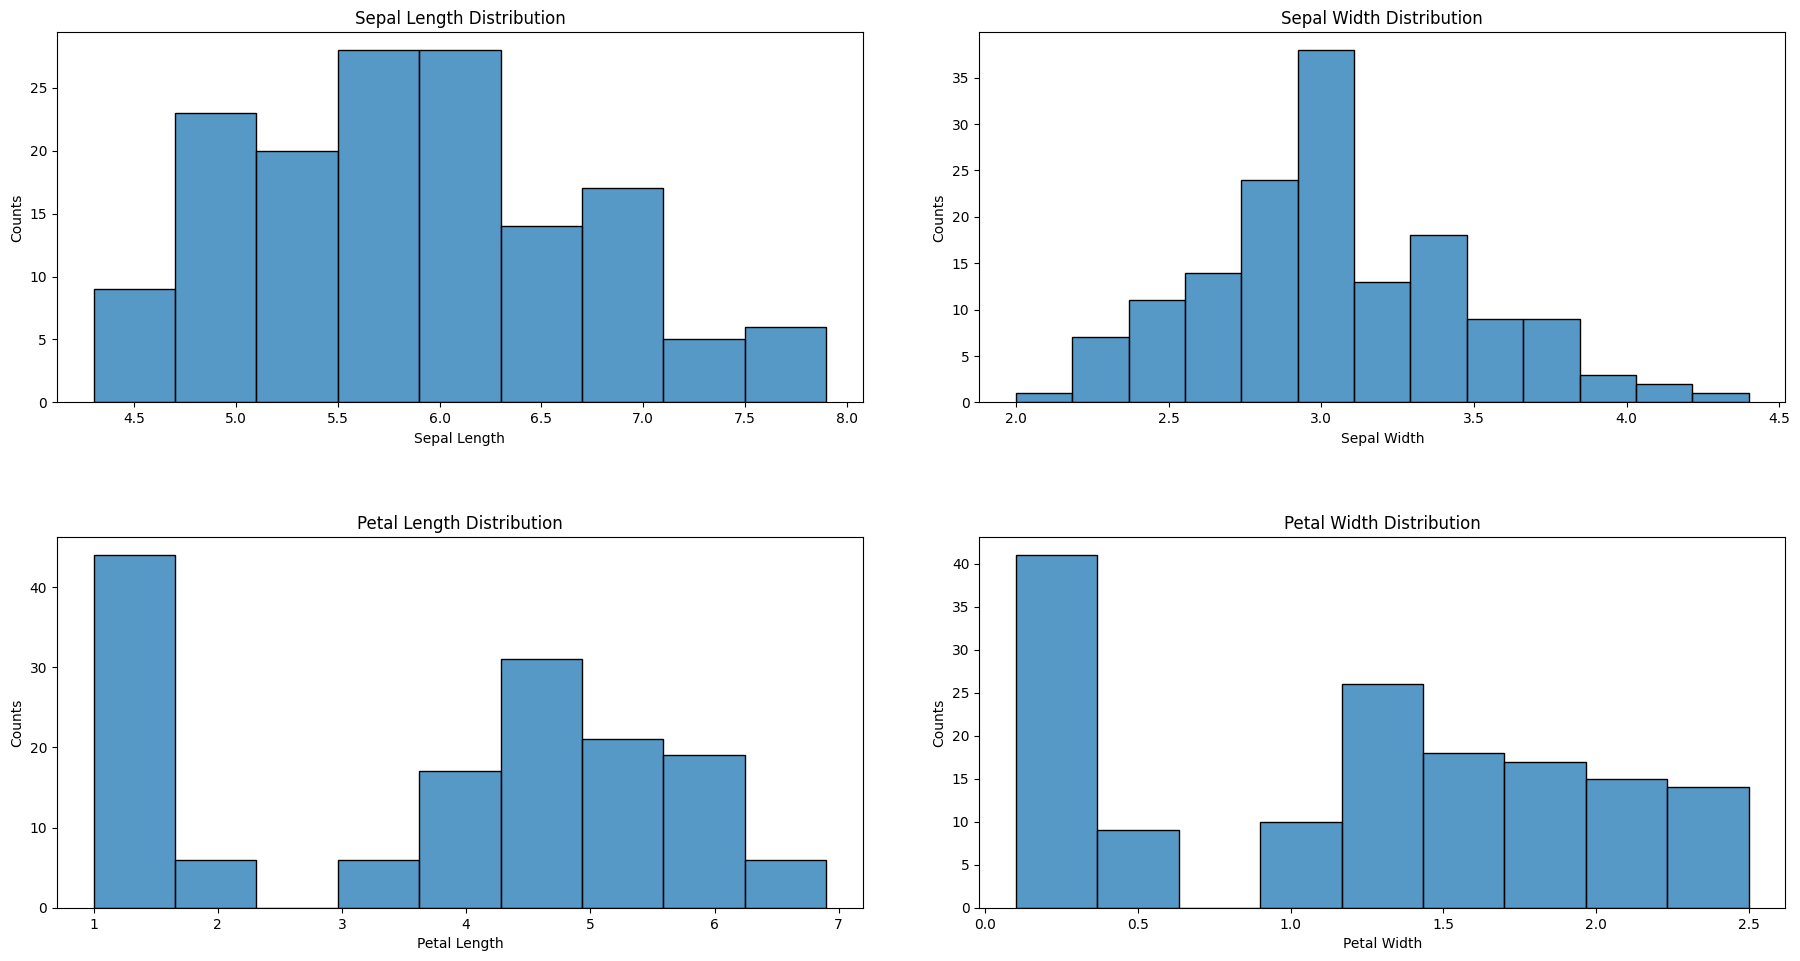

In [14]:
visualizer.univariate_subplots(data[cols['continuous']], 'numerical_counts', 2, 2)

## Discrete

In [15]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Categorical

In [16]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Target

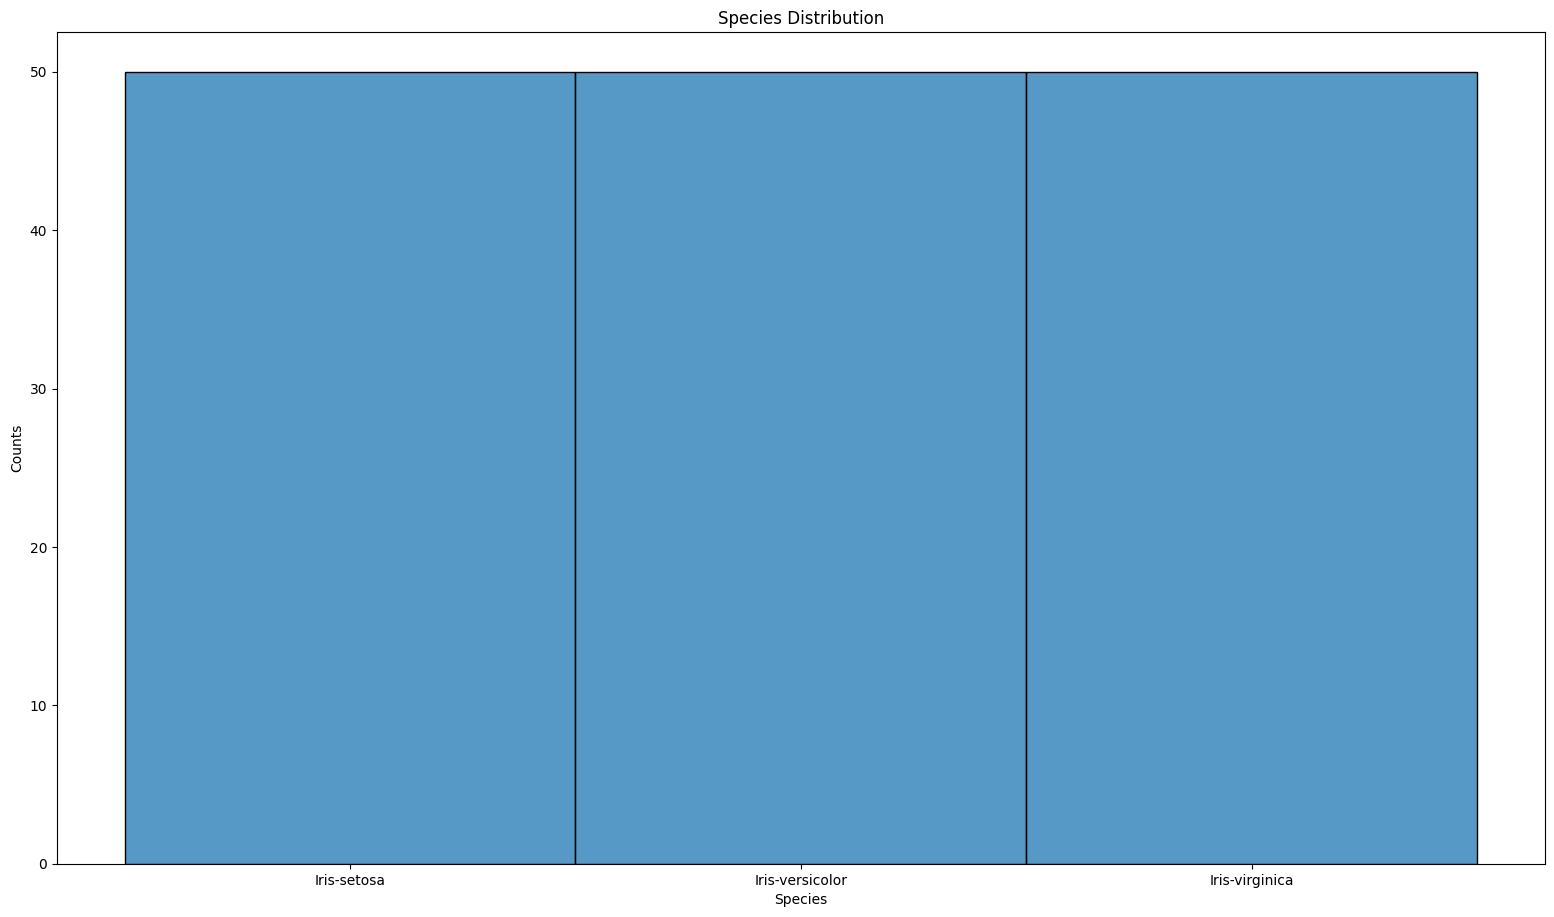

In [17]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

In [18]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

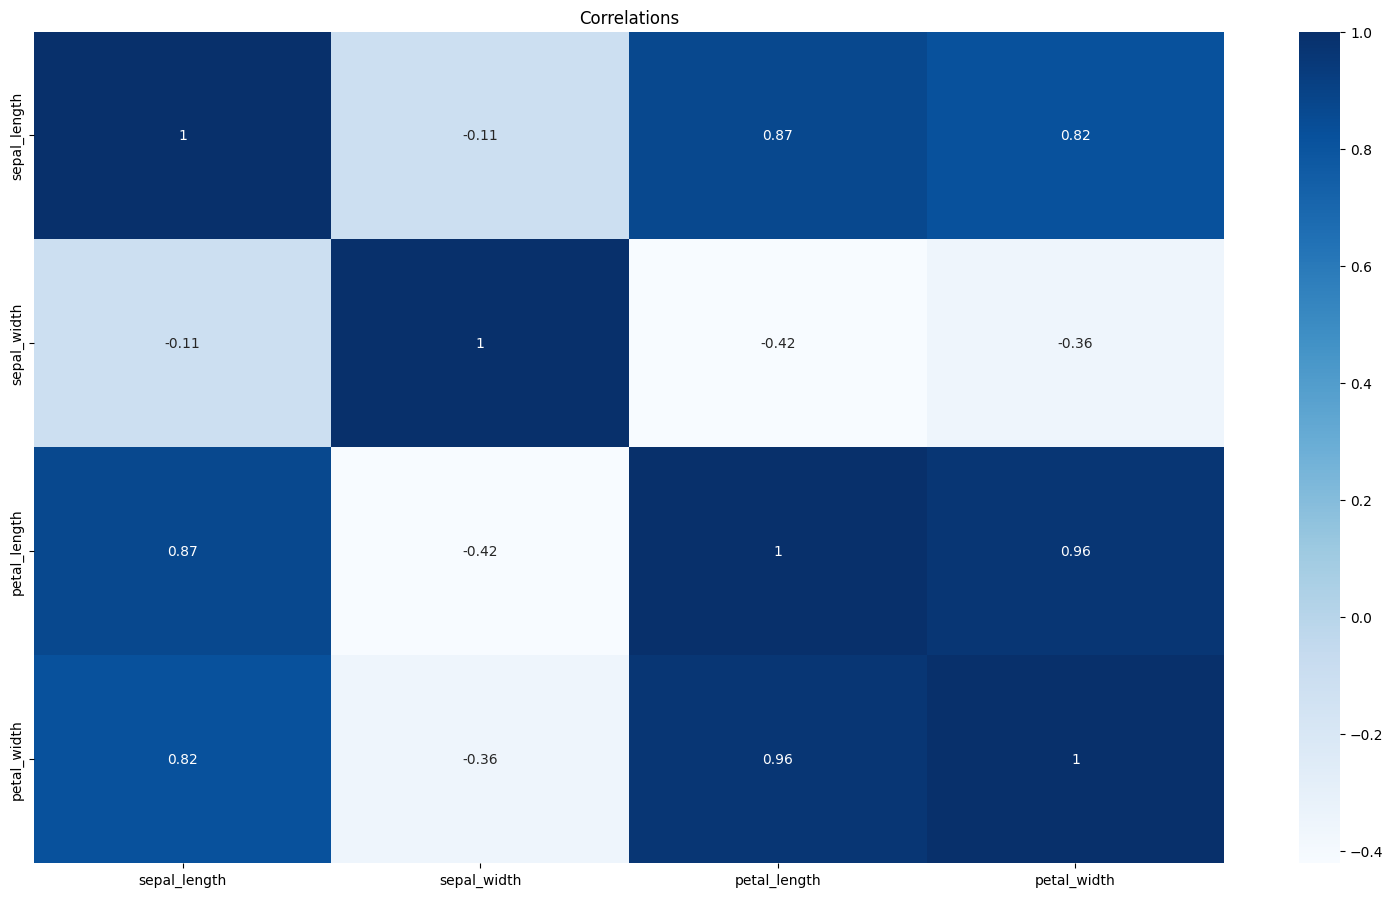

In [19]:
visualizer.correlations(data, cols['continuous']+cols['discrete'])

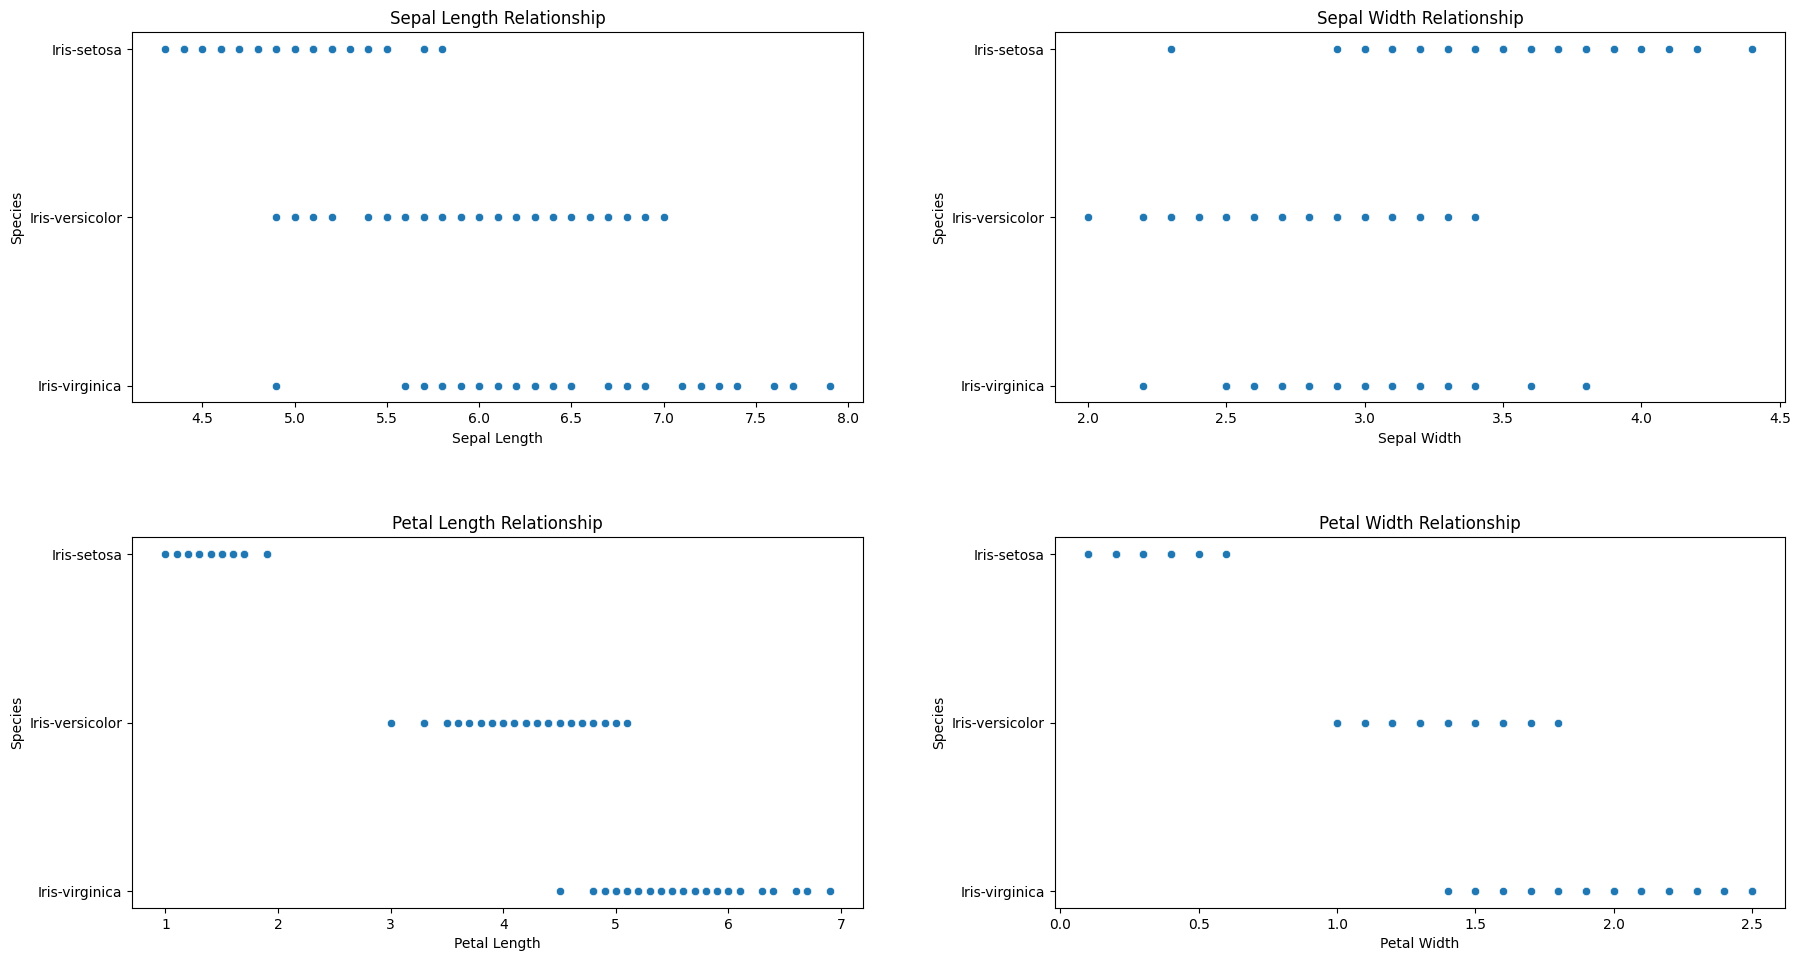

In [20]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

# Conclusion
- Missing Values: None
- Duplicated Values: Few
- Notes
    - petal_length, sepal_length and petal_width columns have high correlation with eachother
    - Since sepal_length has less correlation with sepal_width, sepal_length can be used out of above three